# Problem statement

In [1]:
# importing necessary libaray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# loading dataset
hr_data=pd.read_csv('C:/Users/Lenovo/Desktop/python excercise/HACKATHON PROJECTS/train_LZdllcl.csv')

In [3]:
# understanding the data
hr_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [4]:
hr_data.head() # top 5 rows

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
hr_data.tail() # last 5 rows

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [6]:
hr_data.shape # checking the rows and column in the dataset

(54808, 14)

In [7]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
hr_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [9]:
hr_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
hr_data.isnull().sum() # checking the null/mising values in the datset

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
# removing the null values in the datset
hr_data.fillna(0,inplace=True)

In [12]:
hr_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [13]:
hr_data.shape # checking the data size after removing the null/mimssingg values

(54808, 14)

In [14]:
hr_data.duplicated().sum() # checking the duplicated values

0

## univariate analysis

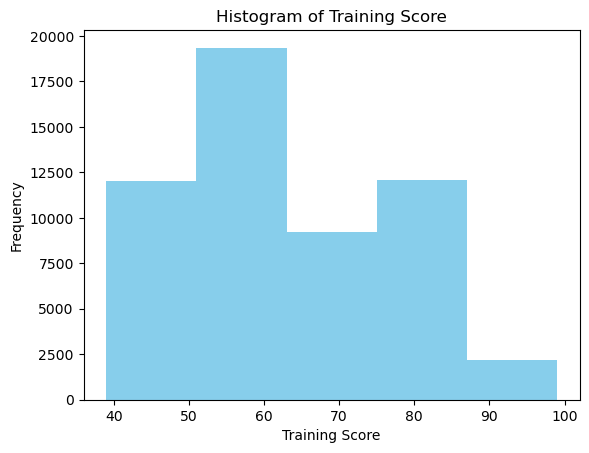

In [15]:
plt.hist(hr_data['avg_training_score'], bins=5, color='skyblue')
plt.xlabel('Training Score')
plt.ylabel('Frequency')
plt.title('Histogram of Training Score')
plt.show()

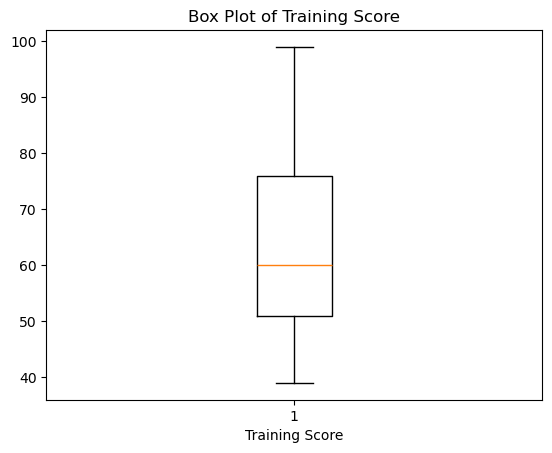

In [16]:
plt.boxplot(hr_data['avg_training_score'])
plt.xlabel('Training Score')
plt.title('Box Plot of Training Score')
plt.show()

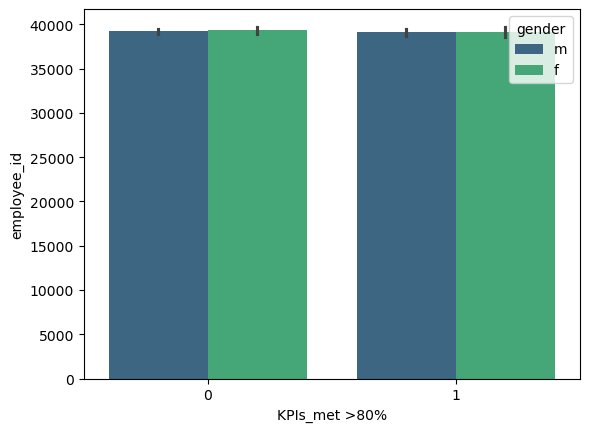

In [17]:
sns.barplot(data=hr_data,
            x='KPIs_met >80%',
            y='employee_id',
            hue='gender',
            palette='viridis')
plt.show()

## Bivariate Analysis

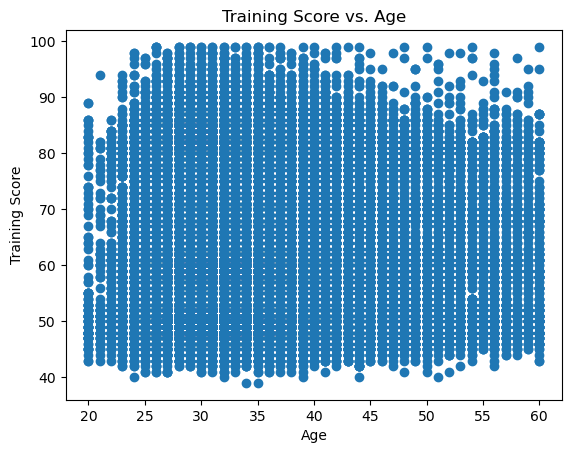

In [18]:
plt.scatter(hr_data['age'], hr_data['avg_training_score'])
plt.title('Training Score vs. Age')
plt.xlabel('Age')
plt.ylabel('Training Score')
plt.show()

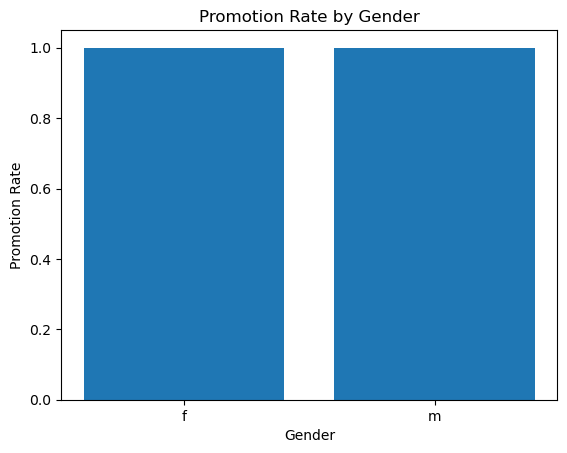

In [19]:
# Bar chart: Gender vs. Promotion Rate
plt.bar(hr_data['gender'], hr_data['is_promoted'])
plt.xlabel('Gender')
plt.ylabel('Promotion Rate')
plt.title('Promotion Rate by Gender')
plt.show()


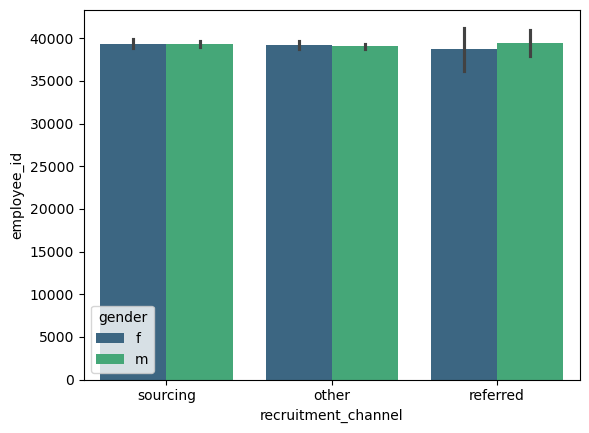

In [20]:
sns.barplot(data=hr_data,
            y='employee_id',
            x='recruitment_channel',
            hue='gender',
            palette='viridis')
plt.show()

In [21]:
hr_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

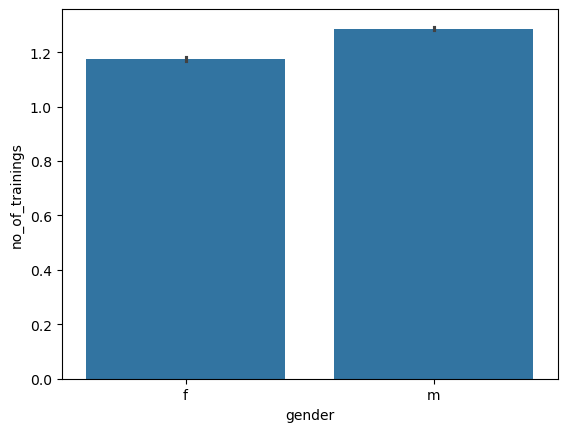

In [22]:
sns.barplot(data=hr_data,
            x='gender',
            y='no_of_trainings',
            )
plt.show()

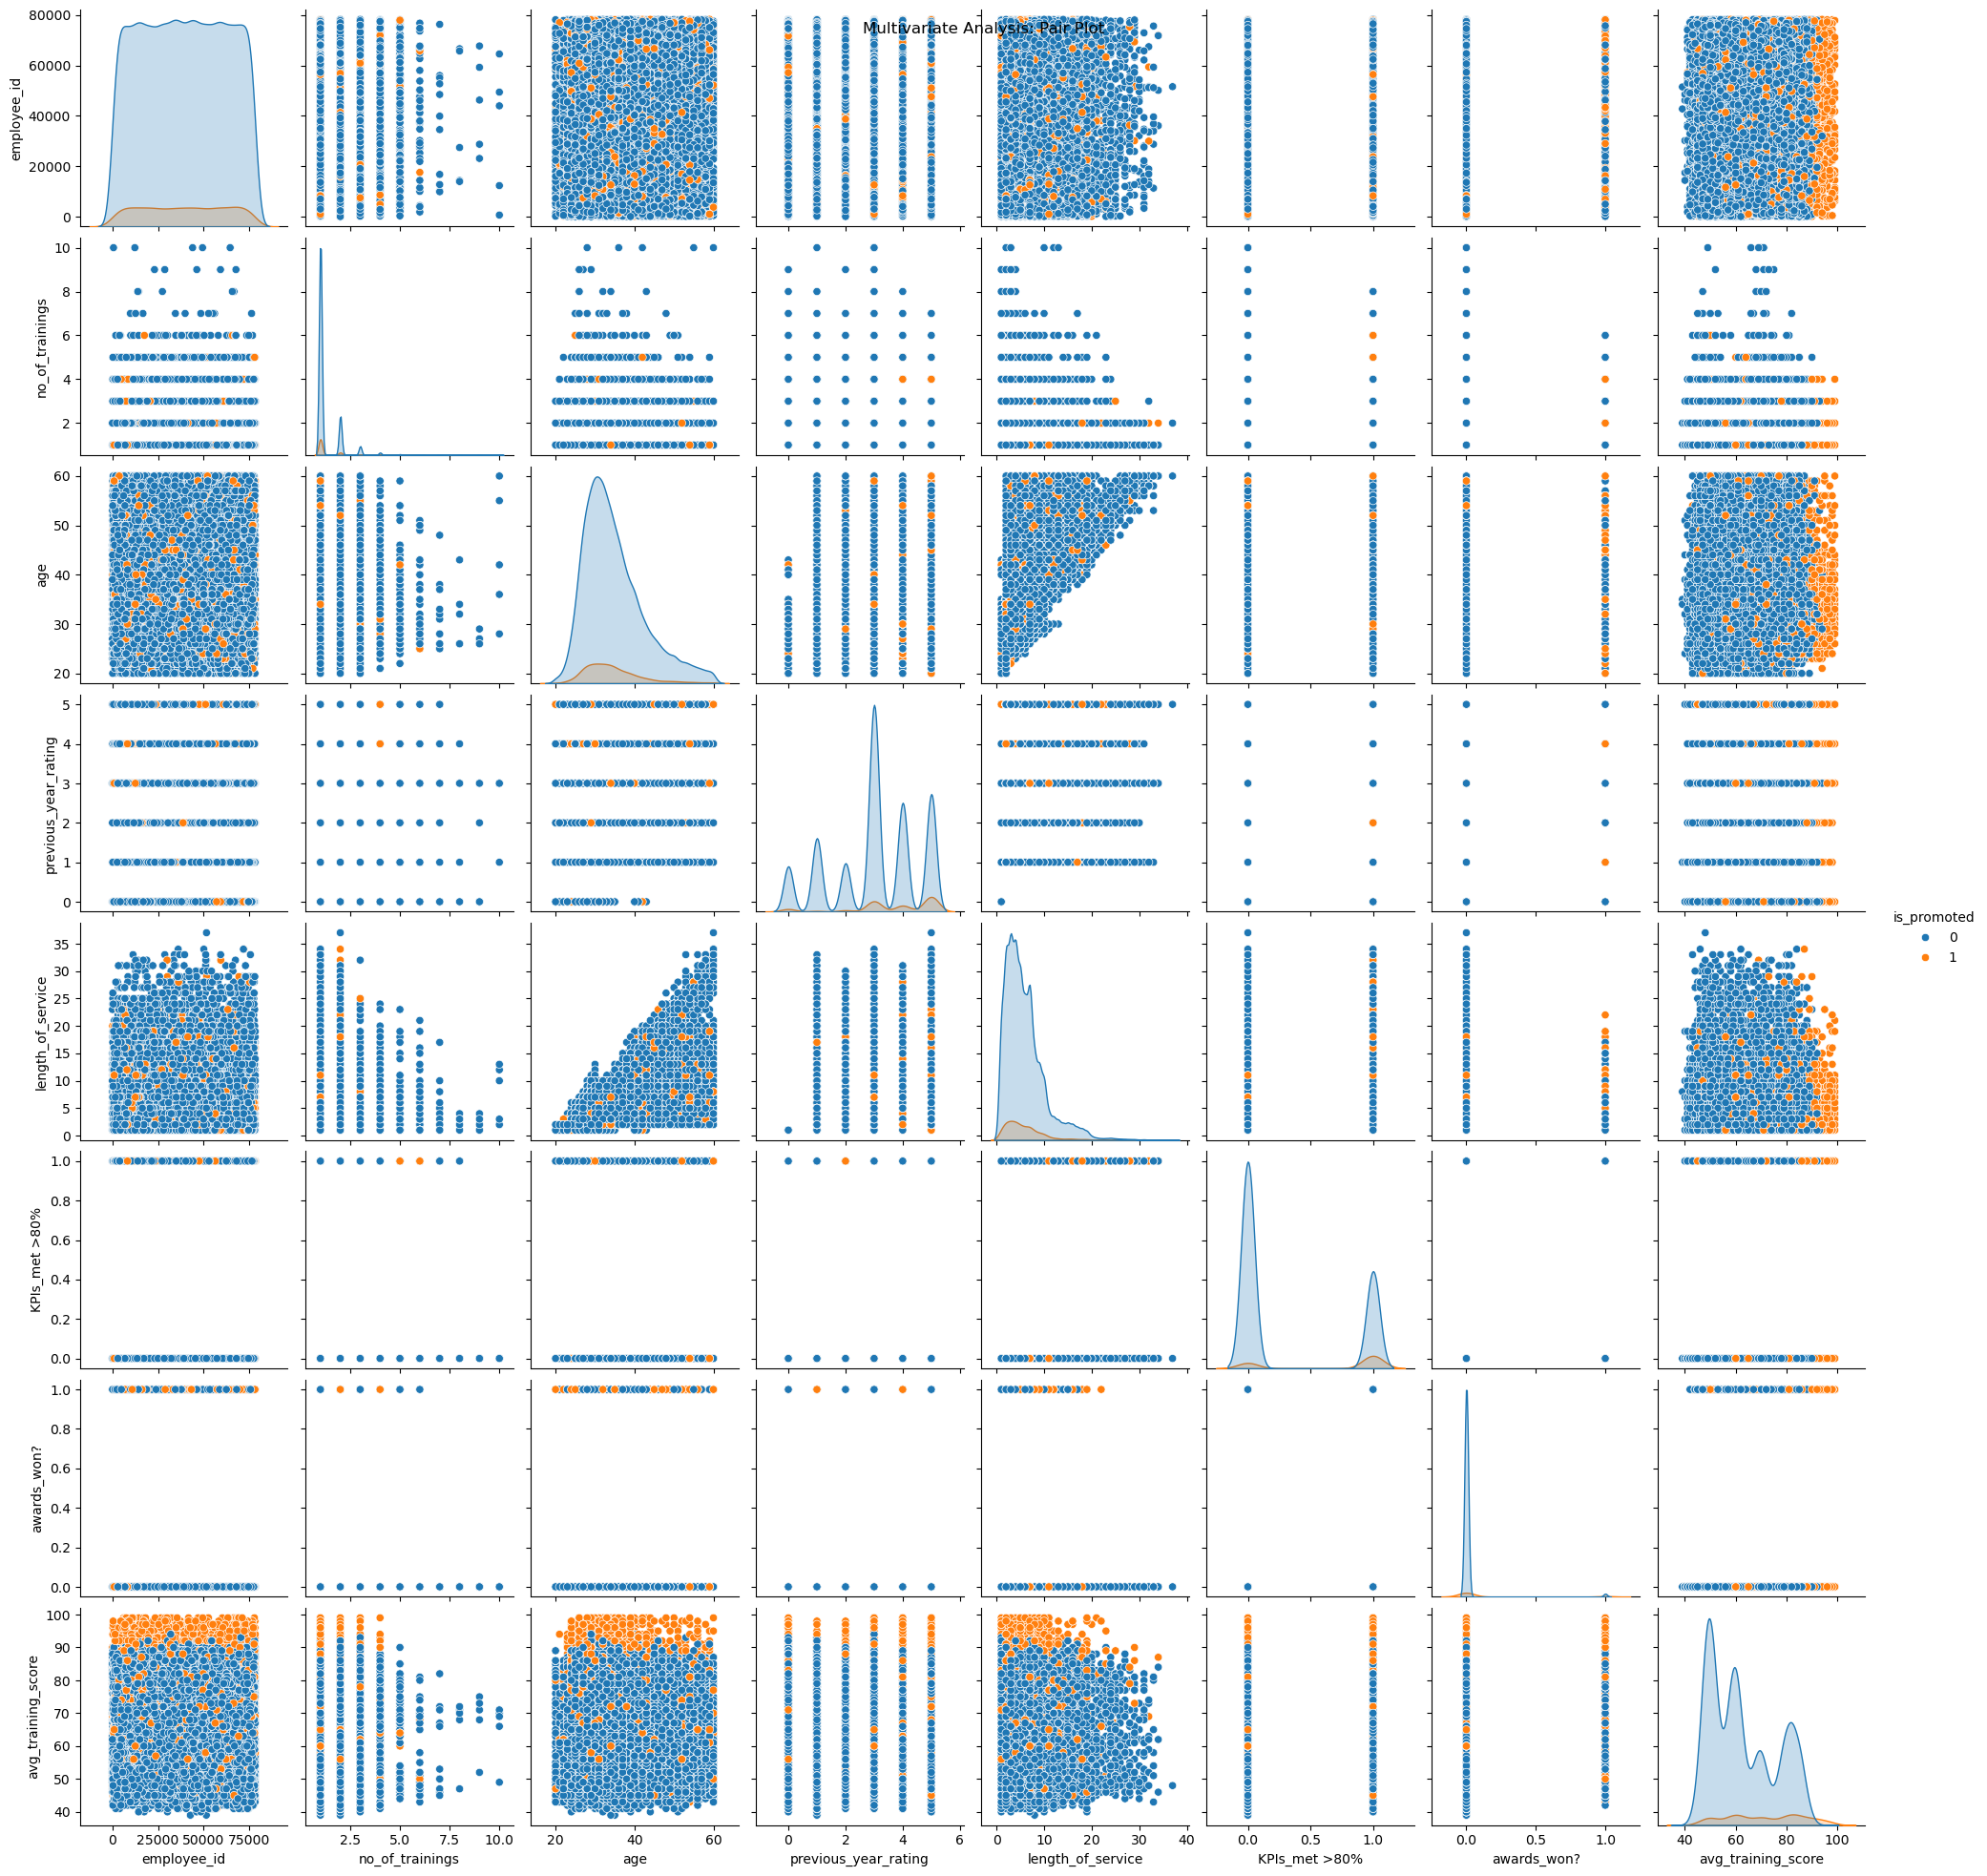

In [23]:
sns.pairplot(hr_data, hue="is_promoted")
plt.suptitle("Multivariate Analysis: Pair Plot")
plt.show()

## Feature engineering

In [24]:
# Convert categorical variables to numeric using one-hot encoding
encoded_data = pd.get_dummies(hr_data, columns=['department', 'region', 'education', 'gender', 
                                           'recruitment_channel'], drop_first=True,dtype='int')

In [25]:
print(encoded_data.info())
print(encoded_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   54808 non-null  int64  
 1   no_of_trainings               54808 non-null  int64  
 2   age                           54808 non-null  int64  
 3   previous_year_rating          54808 non-null  float64
 4   length_of_service             54808 non-null  int64  
 5   KPIs_met >80%                 54808 non-null  int64  
 6   awards_won?                   54808 non-null  int64  
 7   avg_training_score            54808 non-null  int64  
 8   is_promoted                   54808 non-null  int64  
 9   department_Finance            54808 non-null  int32  
 10  department_HR                 54808 non-null  int32  
 11  department_Legal              54808 non-null  int32  
 12  department_Operations         54808 non-null  int32  
 13  d

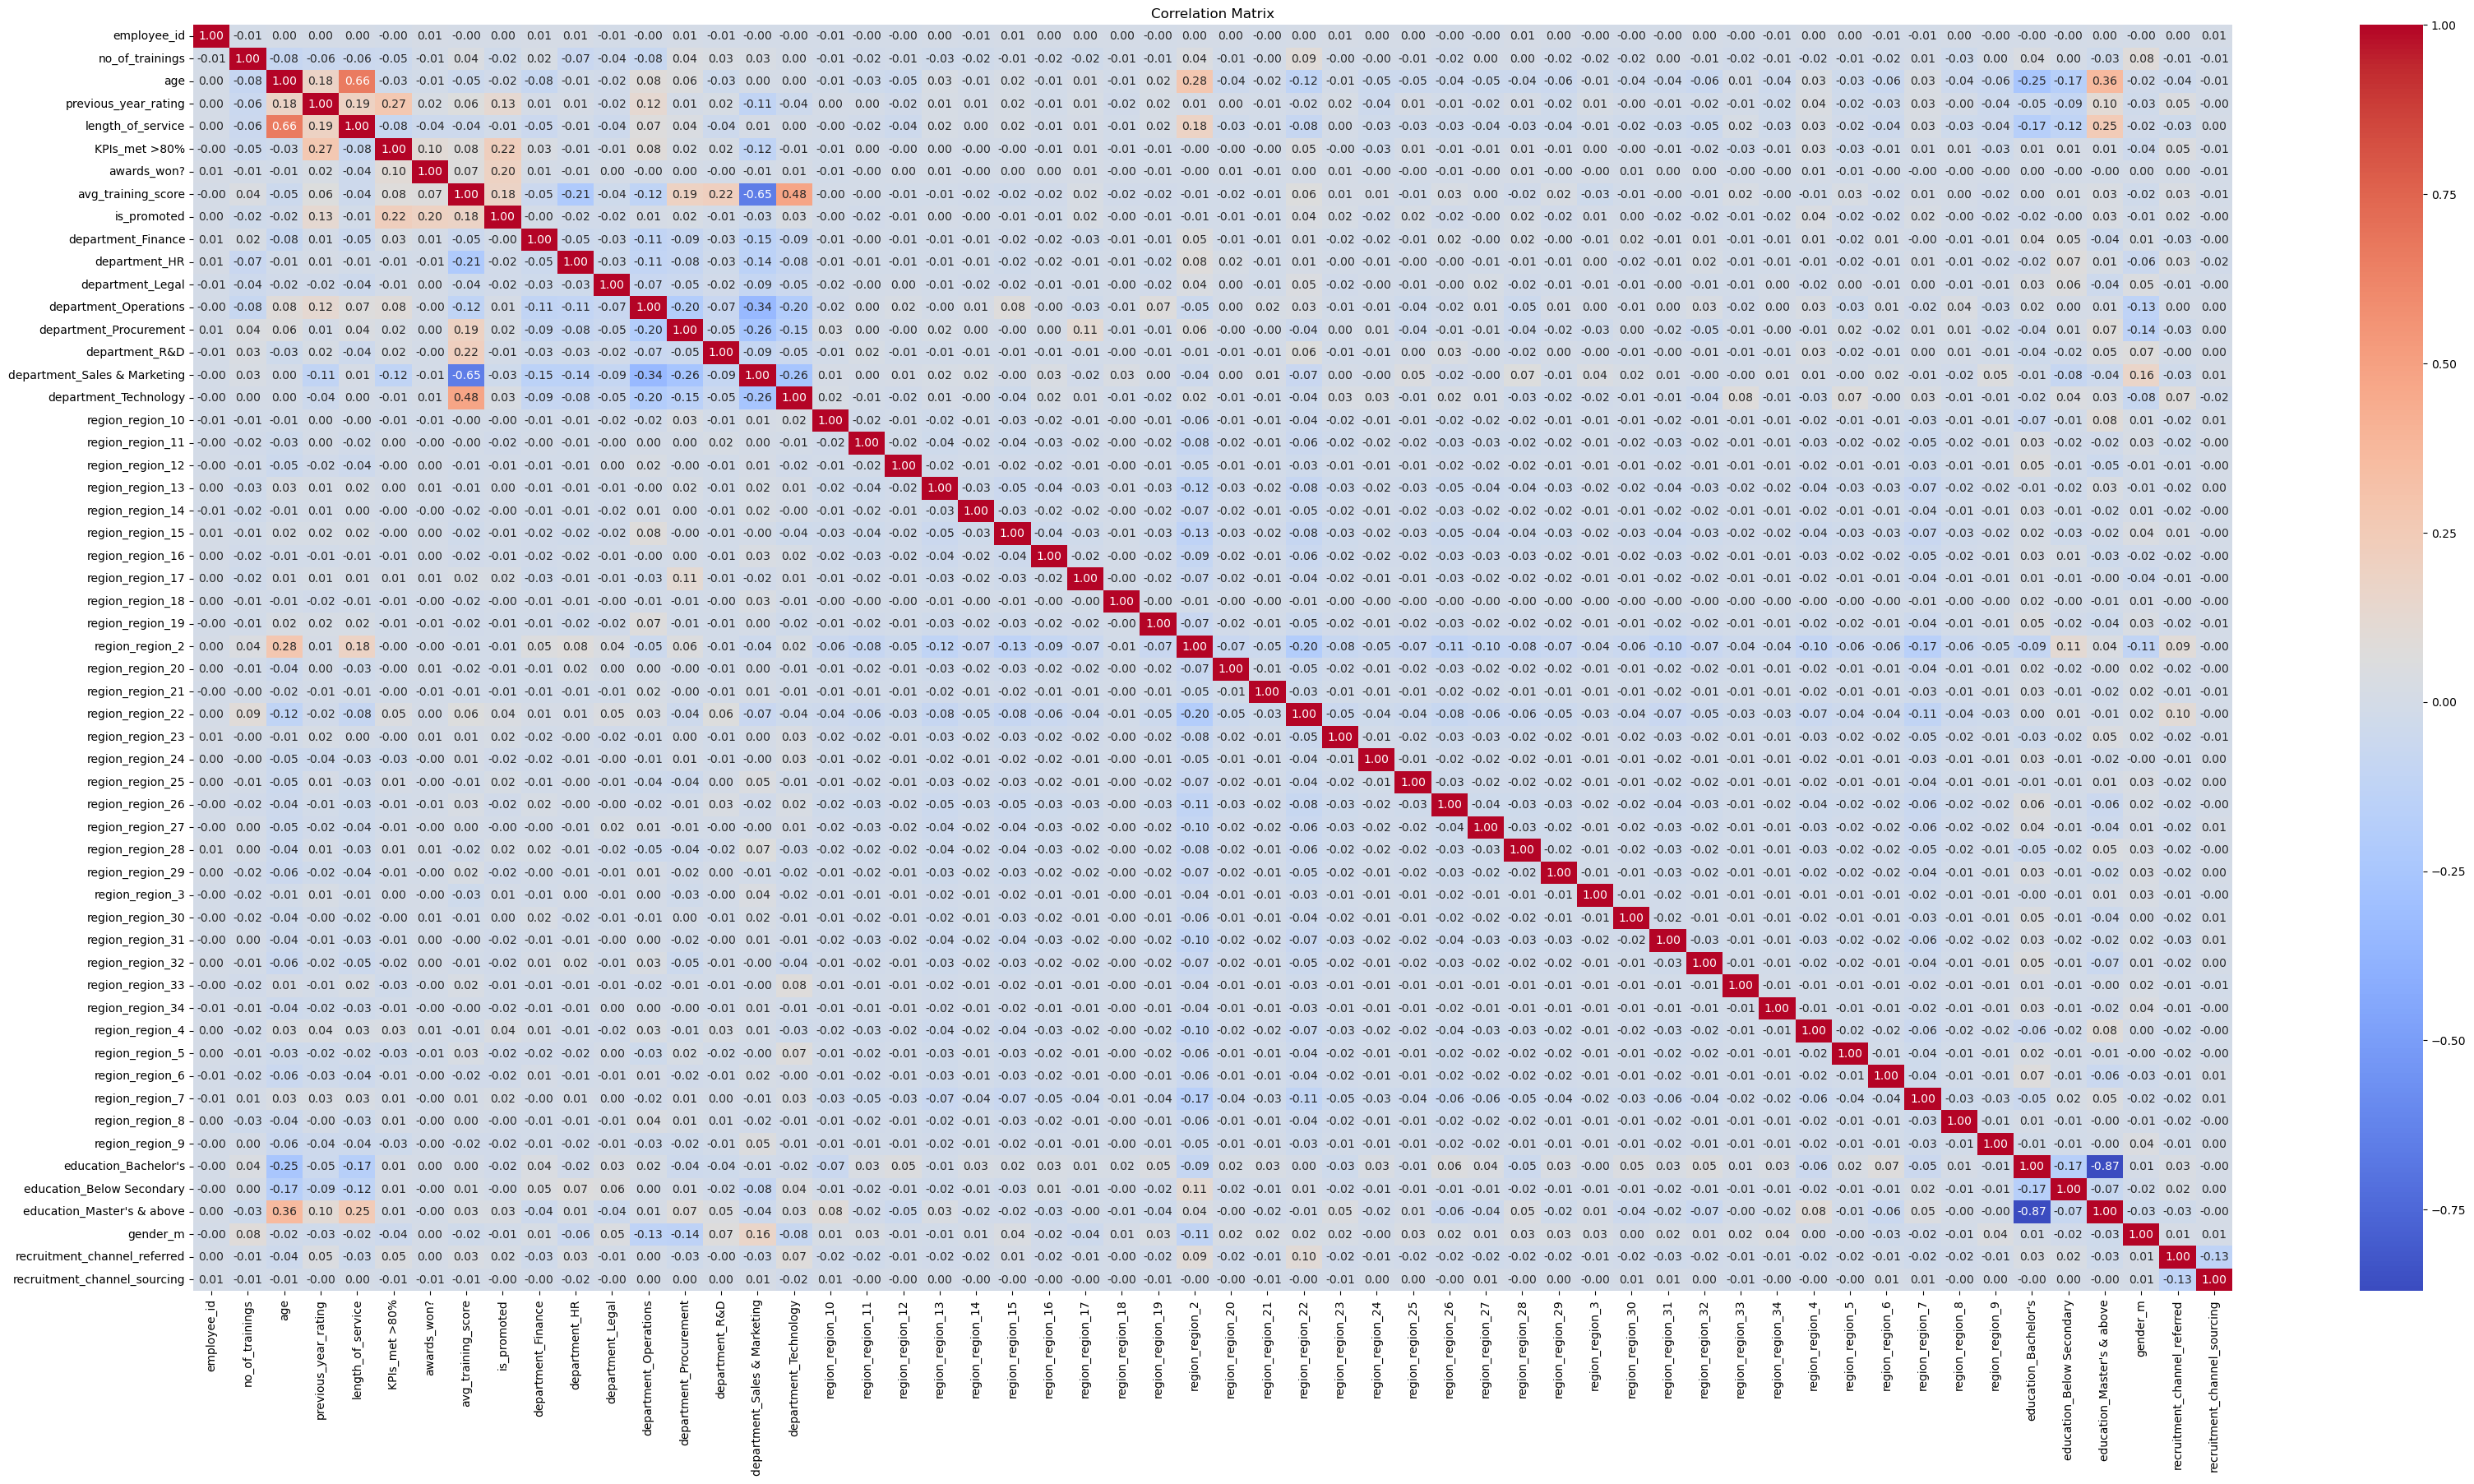

In [26]:
plt.figure(figsize=(40,20))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Split the data into features (X) and target (y)
X = encoded_data.drop('is_promoted', axis=1)
y = encoded_data['is_promoted']

In [28]:
print(X.shape)
print(y.shape)

(54808, 55)
(54808,)


In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(43846, 55)
(43846,)
(10962, 55)
(10962,)


In [31]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and evaluation

In [32]:
# Training a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [33]:
# Make predictions
y_pred1 = model.predict(X_test)

In [34]:
# Calculate F1 score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred1)
print(f"F1 score: {f1:.4f}")
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')

F1 score: 0.3860
Accuracy: 0.93


In [35]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[9992   62]
 [ 676  232]]


In [36]:
# Classification Report
classification_rep = classification_report(y_test, y_pred1)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10054
           1       0.79      0.26      0.39       908

    accuracy                           0.93     10962
   macro avg       0.86      0.62      0.68     10962
weighted avg       0.92      0.93      0.92     10962



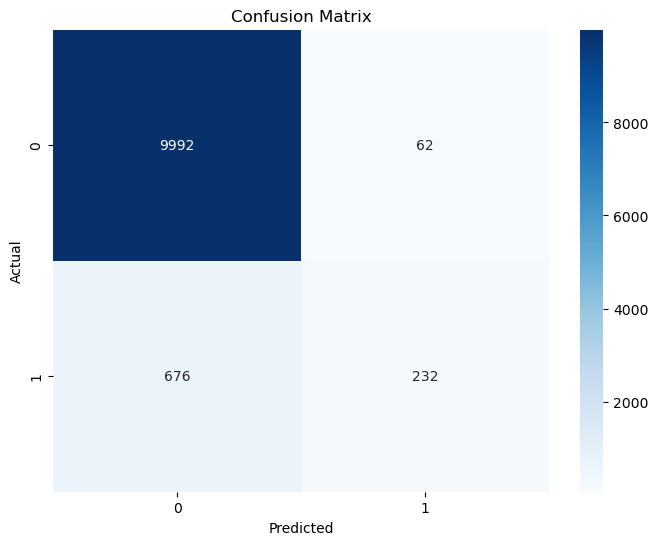

In [37]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=hr_data["is_promoted"].unique(),
            yticklabels=hr_data["is_promoted"].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
hr_data2=pd.read_csv('C:/Users/Lenovo/Desktop/python excercise/HACKATHON PROJECTS/test_2umaH9m.csv')

In [39]:
hr_data2.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [40]:
hr_data2.shape

(23490, 13)

In [41]:
hr_data2.fillna(0,inplace=True)

In [42]:
hr_data2.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [43]:
hr_data2.shape

(23490, 13)

In [44]:
hr_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [45]:
hr_data2.duplicated().sum()

0

In [46]:
hr_data2.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,0.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76


In [47]:
## Feature engineering for test data
# Convert categorical variables to numeric using one-hot encoding
encoded_data2 = pd.get_dummies(hr_data2, columns=['department', 'region', 'education', 'gender', 
                                           'recruitment_channel'], drop_first=True,dtype='int')

In [48]:
encoded_data2.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,1,24,0.0,1,1,0,77,0,0,...,0,0,0,0,1,0,0,1,0,1
1,74430,1,31,3.0,5,0,0,51,0,1,...,0,0,0,0,1,0,0,0,0,0
2,72255,1,31,1.0,4,0,0,47,0,0,...,0,0,0,0,1,0,0,1,0,0
3,38562,3,31,2.0,9,0,0,65,0,0,...,0,0,0,0,1,0,0,0,0,0
4,64486,1,30,4.0,7,0,0,61,1,0,...,0,0,0,0,1,0,0,1,0,1


In [49]:
encoded_data2.shape

(23490, 55)

In [50]:
# encoded_data2.shape
hr_data2.shape

(23490, 13)

In [51]:
# Scaling the encoded_data2
encoded_data2=scaler.transform(encoded_data2)

In [52]:
encoded_data2.shape

(23490, 55)

In [53]:
#making prediction
y_pred2=model.predict(encoded_data2)

In [54]:
# checking the size of y_pred2
y_pred2.shape

(23490,)

In [55]:
y_pred2

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [56]:
# creating a dataframe of submission file
submission = pd.DataFrame({
        "employee_id": hr_data2["employee_id"],
        "is_promoted": y_pred2
    })

In [57]:
submission.to_csv('C:/Users/Lenovo/Desktop/python excercise/HACKATHON PROJECTS/submission.csv', index=False)

In [58]:
# checking the counts of how many promoted or not
submission['is_promoted'].value_counts()

is_promoted
0    22856
1      634
Name: count, dtype: int64

 # DECISION TREE

In [63]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn import tree

In [60]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [61]:
# Train the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
# #Visualization 1
# fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4))

# tree.plot_tree(clf);
# #fig.savefig('../images/plottreedefault.png')

In [67]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [68]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


In [70]:
y_pred_DT=clf.predict(encoded_data2)

In [71]:
y_pred_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
# Create and train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Make predictions using Random Forest
rf_y_pred = rf_clf.predict(X_test)

In [75]:
# Evaluate Random Forest model
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.92


In [82]:
# predicting randomforest classifier on test dataset
rf_y_pred2=rf_clf.predict(encoded_data2)

In [83]:
rf_y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Gradient Boosting classifier

In [79]:
# Create and train a Gradient Boosting classifier
# Import necessary libraries
from sklearn.ensemble import  GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [80]:
# Make predictions using Gradient Boosting
gb_y_pred = gb_clf.predict(X_test)

In [81]:
# Evaluate Gradient Boosting model
gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.93


In [84]:
# making prediction on test data
gb_y_pred2=gb_clf.predict(encoded_data2)

In [85]:
gb_y_pred2

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [86]:
# Compare results with single Decision Tree
print("\nComparison with Single Decision Tree:")
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Comparison with Single Decision Tree:
Decision Tree Accuracy: 0.90
Random Forest Accuracy: 0.94
Gradient Boosting Accuracy: 0.94


In [88]:
# Compare results with single Decision Tree
print(f"Logistic Regression f1 score: {f1:.2f}")
print(f"Decision Tree f1 score: {f1_score:.2f}")
print(f"Random Forest f1 score: {rf_f1_score:.2f}")
print(f"Gradient Boosting f1 score: {gb_f1_score:.2f}")

Logistic Regression f1 score: 0.39
Decision Tree f1 score: 0.90
Random Forest f1 score: 0.92
Gradient Boosting f1 score: 0.93


In [91]:
submission = pd.DataFrame({
        "employee_id": hr_data2["employee_id"],
        "is_promoted": gb_y_pred2
    })
submission.to_csv('./submission.csv', index=False) 

In [92]:
submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [93]:
submission.shape

(23490, 2)

In [97]:
submission.value_counts()

employee_id  is_promoted
3            0              1
52221        0              1
52217        0              1
52216        0              1
52207        0              1
                           ..
25757        0              1
25756        0              1
25755        0              1
25754        0              1
78295        0              1
Name: count, Length: 23490, dtype: int64